<h1 style="text-align:center">Frequecy Response of a Mass-Spring-Damper System <br> to Harmonic Seismic (Position) Inputs</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook looks at the frequency response of a simple mass-spring-damper system like the one shown in Figure 1.

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = c \dot{y} + ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

# Import the plotting functions  
import matplotlib.pyplot as plt

In [3]:
# Define the System Parameters
m = 1.0                  # kg
k = (2.0 * np.pi)**2.    # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)      # Natural Frequency (rad/s)

z = 0.25                 # Define a desired damping ratio
c = 2 * z * wn * m       # calculate the damping coeff. to create it (N/(m/s))

wd = wn*np.sqrt(1-z**2)  # Damped natural frequency (rad/s)

We can define the normalized transfer function as:

$ \quad G(\Omega) = \sqrt{\frac{1 + (2\zeta\Omega)^2}{(1-\Omega^2)^2 + (2\zeta\Omega)^2}} e^{i \phi} $

where

$ \quad \phi = \tan^{-1}\left({2\zeta\Omega}\right) - \tan^{-1}\left({\frac{2\zeta\Omega}{1-\Omega^2}}\right)$

Let's plot the magnitude and phase of this for a few different damping ratios

In [4]:
# Set up the normalized frequency range
w = np.linspace(0,20,2000)            # Normalize Freq, 0-20 with 2000 points in-between

# Define the normalized transfer function for several different damping ratios
z = 0.0;
mag_normal_un = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_un = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

# Let's mask the discontinuity in the undamped phase response
# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(1-w) <= 1e-2)
phase_un[pos] = np.nan

z = 0.1;
mag_normal_0p1 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p1 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

z = 0.2;
mag_normal_0p2 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p2 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi

z = 0.4;
mag_normal_0p4 = np.sqrt((1+(2*z*w)**2)/((1-w**2)**2+(2*z*w)**2))
phase_0p4 = (np.arctan2(2*z*w,1) - np.arctan2((2*z*w),(1-w**2)))*180/np.pi


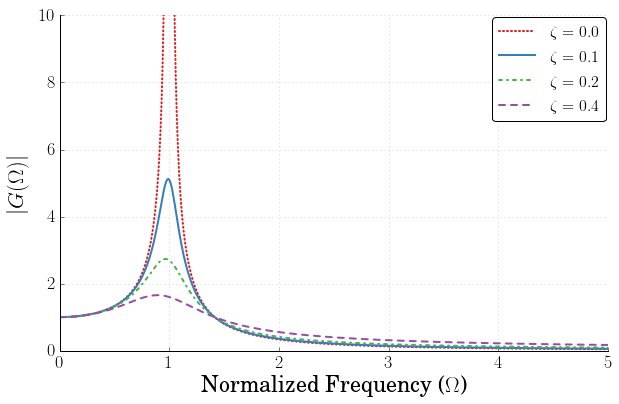

In [5]:
# Let's plot the magnitude of the frequency response

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency ($\Omega$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$|G(\Omega)|$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,mag_normal_un,  linewidth=2, linestyle = ':',   label=r'$\zeta = 0.0$')
plt.plot(w,mag_normal_0p1, linewidth=2, linestyle = '-',   label=r'$\zeta = 0.1$')
plt.plot(w,mag_normal_0p2, linewidth=2, linestyle = '-.',  label=r'$\zeta = 0.2$')
plt.plot(w,mag_normal_0p4, linewidth=2, linestyle = '--',  label=r'$\zeta = 0.4$')

plt.xlim(0,5)
plt.ylim(0,10)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# savefig('Seismic_Freq_Resp_mag.pdf',dpi=600)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

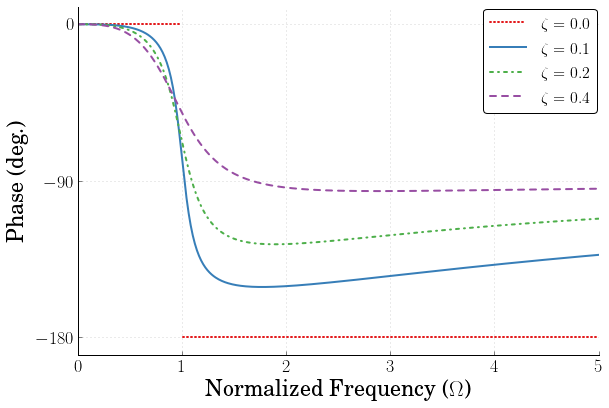

In [6]:
# Now, let's plot the Phase Frequency Response

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency ($\Omega$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Phase (deg.)$',family='Serif',fontsize=22,weight='bold',labelpad=8)

plt.plot(w,phase_un,  linewidth=2, linestyle = ':',  label=r'$\zeta = 0.0$')
plt.plot(w,phase_0p1, linewidth=2, linestyle = '-',  label=r'$\zeta = 0.1$')
plt.plot(w,phase_0p2, linewidth=2, linestyle = '-.', label=r'$\zeta = 0.2$')
plt.plot(w,phase_0p4, linewidth=2, linestyle = '--', label=r'$\zeta = 0.4$')

plt.xlim(0,5)
plt.ylim(-190,10)
plt.yticks([-180,-90,0])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Seismic_Freq_Resp_Phase.pdf',dpi=600)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

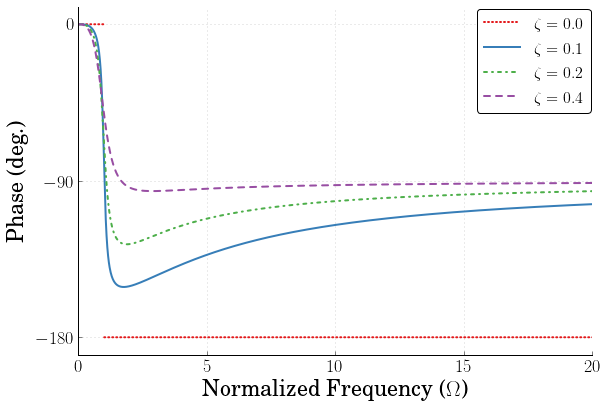

In [7]:
# Plot the Phase Frequency Response over a larger range of frequencies

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency ($\Omega$)',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Phase (deg.)$',family='Serif',fontsize=22,weight='bold',labelpad=8)

plt.plot(w,phase_un,  linewidth=2, linestyle = ':',  label=r'$\zeta = 0.0$')
plt.plot(w,phase_0p1, linewidth=2, linestyle = '-',  label=r'$\zeta = 0.1$')
plt.plot(w,phase_0p2, linewidth=2, linestyle = '-.', label=r'$\zeta = 0.2$')
plt.plot(w,phase_0p4, linewidth=2, linestyle = '--', label=r'$\zeta = 0.4$')

plt.ylim(-190,10)
plt.yticks([-180,-90,0])

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('Seismic_Freq_Resp_Phase_Extended.pdf',dpi=600)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [8]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())